<a href="https://www.kaggle.com/code/sinothmabasa/fraudulent-card-detection?scriptVersionId=133733453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/creditcardcsv/creditcard.csv


**Author : Sinoth Hlayisani Mabasa
Project : Credit Card Fraud Detection
Email : sinoth062@gmail.com**

In this notebook I will try to predict fraud transactions from a given data set. Given that the data is imbalanced, standard metrics for evaluating classification algorithm (such as accuracy) are invalid. I will focus on the following metrics: Sensitivity (true positive rate) and Specificity (true negative rate). Of course, they are dependent on each other, so we want to find optimal trade-off between them. Such trade-off usually depends on the application of the algorithm, and in case of fraud detection I would prefer to see high sensitivity (e.g. given that a transaction is fraud, I want to be able to detect it with high probability).

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**READING DATASET :**

In [3]:
data = pd.read_csv('/kaggle/input/creditcardcsv/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**NULL VALUES:**

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Thus there are no null values in the dataset**

In [5]:
print(data.shape)

(284807, 31)


**Thus there are 284807 rows and 31 columns.**

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**DATA INFORMATION**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**DESCRIPTIVE STATISTICS**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**FRAUD CASES AND GENUINE CASES** 

We need to create a sample of our data with equal number of Fraud and Not Fraud transactions so it is easier for the model to identify variables and patterns that would help to determine if a transaction is fraudulent.

In [9]:
fraud_cases = len(data[data['Class'] == 1])
non_fraud_cases = len(data[data['Class'] == 0])
print('Number of Fraud Cases:',fraud_cases)
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Fraud Cases: 492
Number of Non Fraud Cases: 284315


In [10]:
fraud = data[data['Class'] == 1]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
genuine = data[data['Class'] == 0]
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**EDA(Exploratory Data Analysis)**

We need to see the distributions of our variables so we converted out dataframe into the long format to help plot every feature in one go using **sns.FacetGrid**, We can see that Time and Amount are the only variables that do not follow a normal distribution and are skewed. All the other variables are standardized and follow a normal curve, though some of them have long tails.

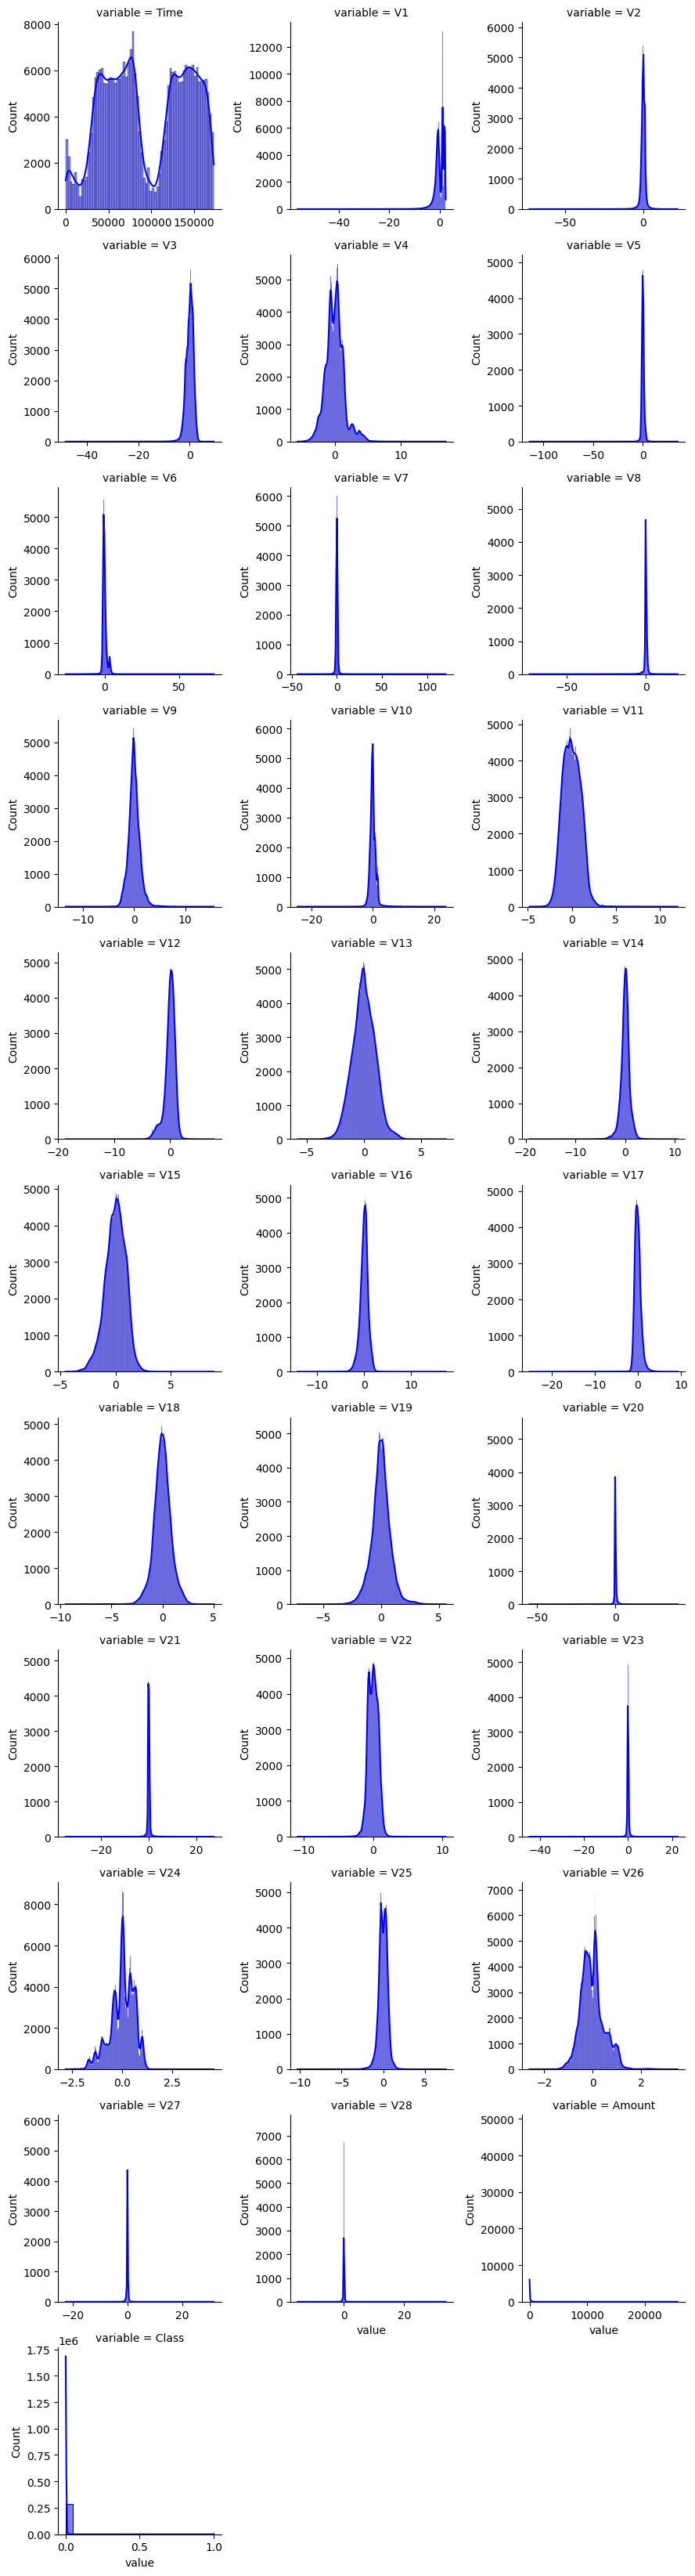

In [12]:
# Reshape the dataframe into a "long" format
melted_df = pd.melt(data, value_vars = data.columns)

# Create a grid of plots with separate histograms and KDE plots for each variable
grids = sns.FacetGrid(melted_df, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
grids.map(sns.histplot, 'value', kde = True, color = 'blue')
plt.show()

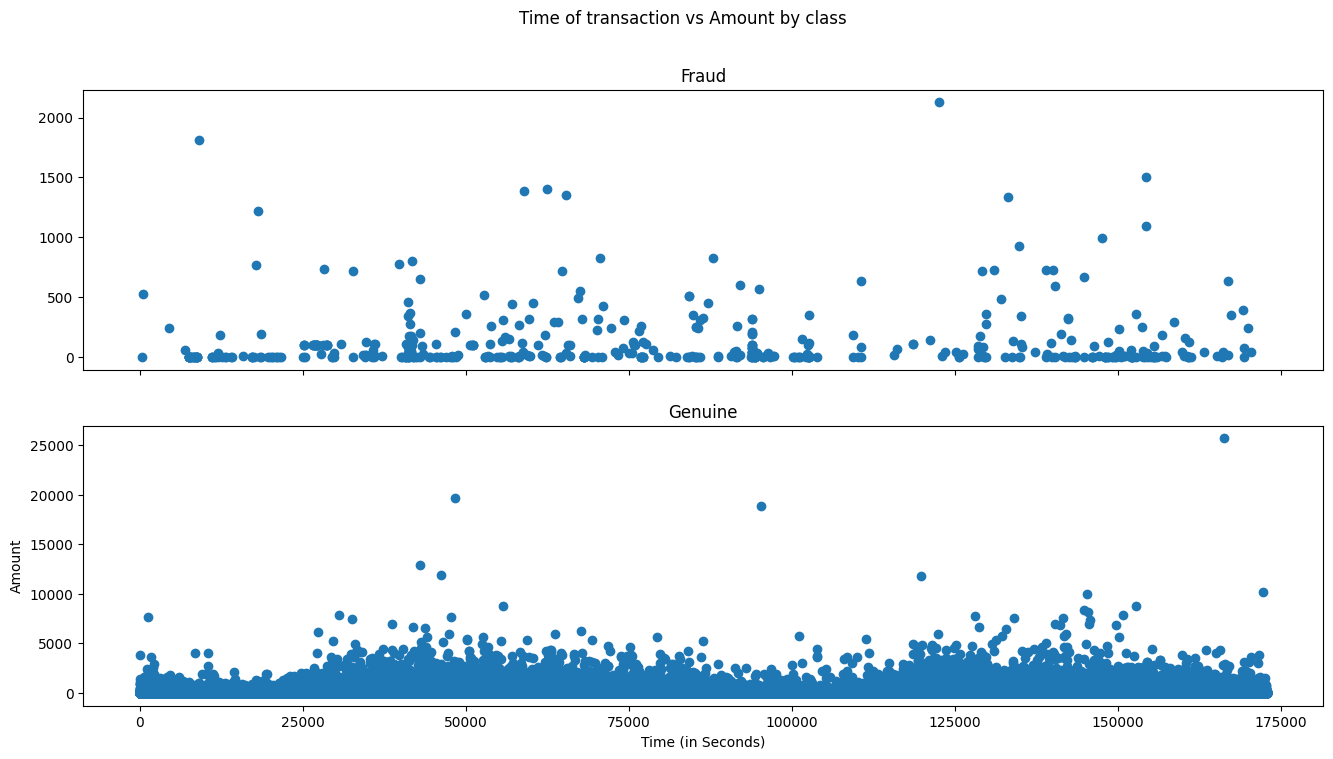

In [13]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**CORRELATION**

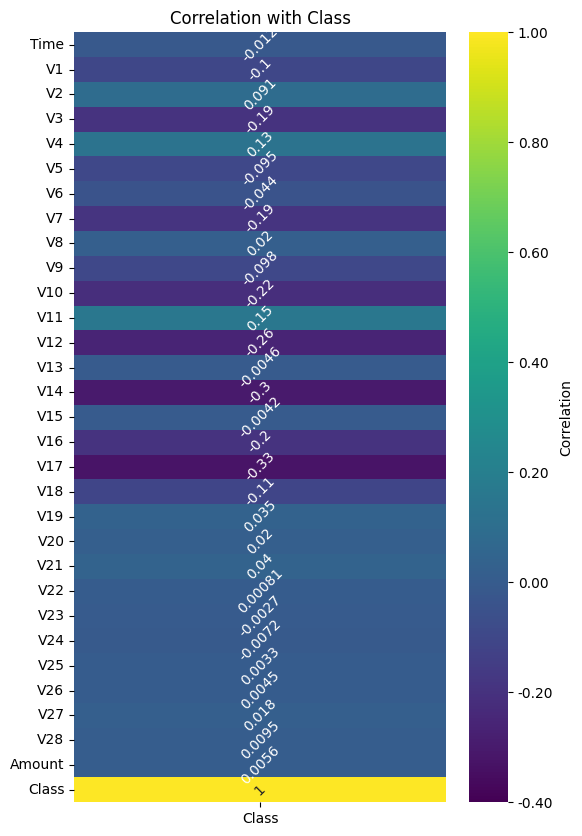

In [14]:
target_feature = 'Class'
corr_matrix = data.corr()

corr_with_target = corr_matrix[target_feature]

fig, ax = plt.subplots(figsize=(6,10))

heatmap = sns.heatmap(corr_with_target.to_frame(), annot=True,
                     cmap = 'viridis', cbar=True,
                     cbar_kws={'format': '%.2f', 'label': 'Correlation'},
                     annot_kws={'rotation': 45},
                     vmin=-0.4, vmax=1)


ax.set_yticklabels(corr_with_target.index, rotation=0)
ax.set_xticklabels(['Class'])

plt.title('Correlation with {}'.format(target_feature))

plt.show()

**Model 1:**

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(['Class'],axis=1)
y = data['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model = rfc.fit(X_train,y_train)
prediction = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction)

0.9995318516437859

**Model 2:**

In [18]:
from sklearn.linear_model import LogisticRegression

X1 = data.drop(['Class'],axis = 1)
y1 = data['Class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state = 123)
lr = LogisticRegression()
model2 = lr.fit(X1_train,y1_train)
prediction2 = model2.predict(X1_test)
accuracy_score(y1_test,prediction2)

0.9989817773252344

**Model 3:**

In [19]:
from sklearn.tree import DecisionTreeRegressor

X2 = data.drop(['Class'],axis=1)
y2 = data['Class']
dt = DecisionTreeRegressor()
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)
model3=dt.fit(X2_train,y2_train)
prediction3=model3.predict(X2_test)
accuracy_score(y2_test,prediction3)

0.9992158515033414